Creare un notebook Python che:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
import numpy as np

1. Si colleghi al proprio database.

In [2]:
# dati diversi

2. Crei un dataframe Pandas contenente le informazioni presenti nella collection.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv')
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


3. Elimini tutte le colonne ad esclusione di 'borough', 'cuisine' e 'name'.

In [4]:
# df.filter()
df = df.drop(df.columns.difference(['borough', 'cuisine', 'name']), axis = 1)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


4. Conti il numero di ristoranti che hanno 'Missing' come quartiere.

In [5]:
df[df['borough'] == 'Missing'].count()['borough']

51

5. Sostituisca alla parola 'Missing' il valore null.

In [6]:
df.replace('Missing', np.nan)

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


6. Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere.

In [7]:
# df = df.dropna(subset=['borough'])
df.dropna(subset=['borough'], inplace = True)

7. Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina che ha più ristoranti.

In [8]:
df['cuisine'].value_counts()

American           6183
Chinese            2418
Café/Coffee/Tea    1214
Pizza              1163
Italian            1069
                   ... 
Iranian               2
Chilean               1
Californian           1
Creole/Cajun          1
Polynesian            1
Name: cuisine, Length: 85, dtype: int64

8. Visualizzi il tipo di cucina con più ristoranti.

In [9]:
df['cuisine'].value_counts().idxmax()

'American'

9. Visualizzi un grafico a barre con i primi 10 tipi di cucina.

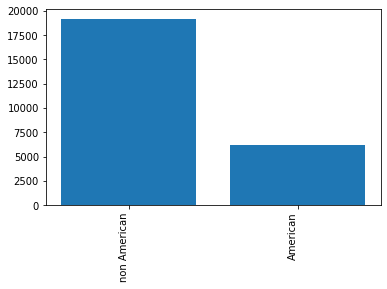

In [18]:
df1 = df['cuisine'].value_counts()[:10]
df1
fig, ax = plt.subplots()
fig.autofmt_xdate(rotation=90)
ax.bar(df1.index, df1)
plt.show()

10. Calcoli il numero di ristoranti per ogni quartiere.

In [11]:
df['borough'].value_counts()

Manhattan        10259
Brooklyn          6086
Queens            5656
Bronx             2338
Staten Island      969
Missing             51
Name: borough, dtype: int64

11. Visualizzi i dati precedenti in un grafico a torta.

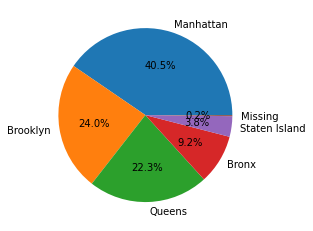

In [12]:
a = df['borough'].value_counts()
fig, ax = plt.subplots()
ax.pie(a, autopct = '%1.1f%%', labels = a.index)
plt.show()

12. Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici.

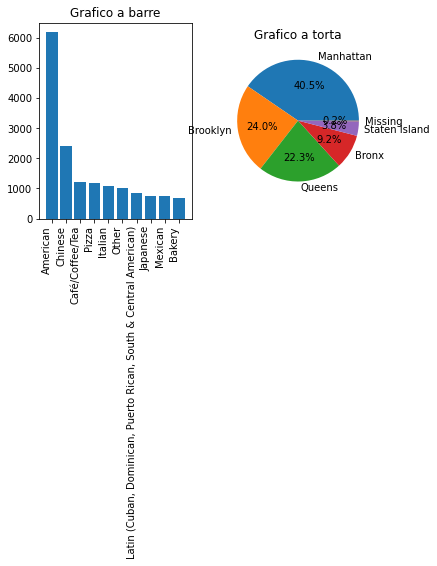

In [13]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title('Grafico a barre') # ax[0] è il primo grafico
ax[1].set_title('Grafico a torta') # ax[1] è il secondo grafico
ax[0].bar(df1.index, df1)
ax[1].pie(a, autopct = '%1.1f%%', labels = a.index)
fig.autofmt_xdate(rotation=90)
plt.show()

# plt.savefig('risultato.pdf') salvare un file in Colab

13. Crei un nuovo dataframe sostituendo la parola 'non American' a tutti i tipi di cucina che non sono americani.

In [14]:
df['cuisine'][df['cuisine']!='American']='non American'
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


In [15]:
# df['cuisine'].loc[df['cuisine'] != 'American']= 'non American'
# df

14. Visualizzi, per ogni quartiere, il numero di ristorinati di cucina americana e non americana.

In [16]:
df1 = df.groupby(['borough', 'cuisine']).count()
df1

name
borough       cuisine           
Bronx         American       411
              non American  1911
Brooklyn      American      1273
              non American  4773
Manhattan     American      3205
              non American  7006
Missing       American        10
              non American    41
Queens        American      1040
              non American  4575
Staten Island American       244
              non American   719

15. Crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di cucina americana e una colonna che contiene il numero di ristoranti che propongono cucine non americane.

In [17]:
# df2 = df1.unstack().reset_index(axis = 1)
# df2

16. Resetti l'indice in modo da avere le tre colonne necessarie per costruire un grafico a barre.

17. Visualizzi un istogramma in cui per ogni quartiere si visualizzi una barra con il numero dei ristoranti americani ed una per quelli non americani.